## Graph Reconstruction from Facebook data

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from tsne import TSNE as TSNE
import umap

C:\Users\jiaze\anaconda3\envs\uml_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the edges from the file
file_path = 'datasets/facebook_combined.txt'
edges = []

with open(file_path, 'r') as file:
    for line in file:
        node1, node2 = map(int, line.strip().split())
        edges.append((node1, node2))

In [3]:
# Create the graph
G = nx.Graph()
G.add_edges_from(edges)

In [4]:
# Get all-pairs shortest path lengths as a dictionary
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [5]:
# Create the distance matrix
num_nodes = 4039
distance_matrix = np.full((num_nodes, num_nodes), np.inf)

for i in range(num_nodes):
    for j, dist in shortest_path_lengths.get(i, {}).items():
        distance_matrix[i, j] = dist

distance_matrix[np.isinf(distance_matrix)] = -1

### t-SNE visualization

In [6]:
tsne = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
tsne_embedding = tsne.fit_transform(distance_matrix)

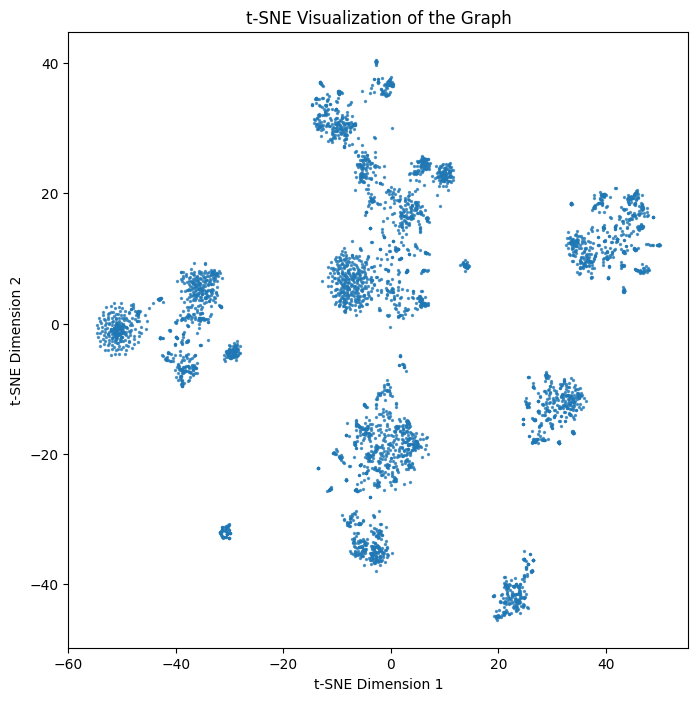

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=2, alpha=0.7)
plt.title("t-SNE Visualization of the Graph")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.savefig("./saved_figures/" + "tsne_graph.png")
plt.show()

### UMAP visualization

In [8]:
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="precomputed", random_state=42)
umap_embedding = umap_reducer.fit_transform(distance_matrix)

C:\Users\jiaze\anaconda3\envs\uml_project\lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\jiaze\anaconda3\envs\uml_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


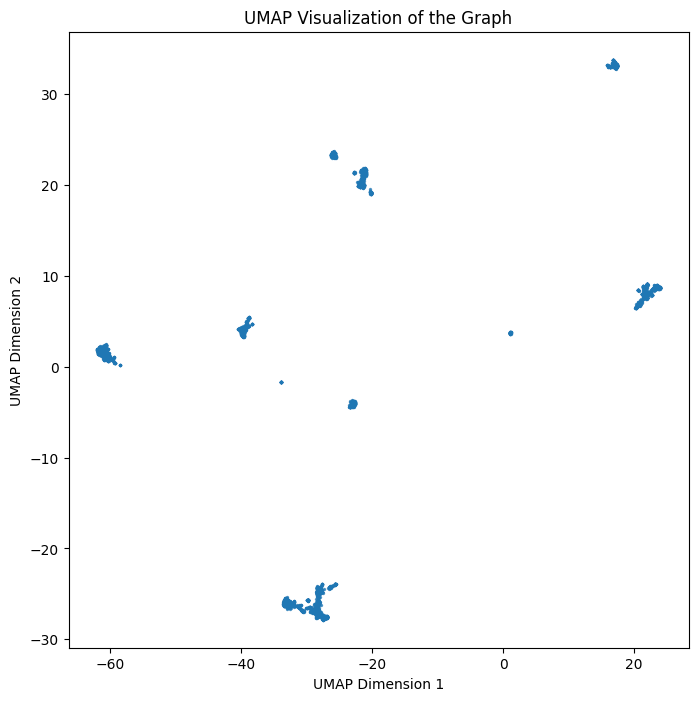

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=2, alpha=0.7)
plt.title("UMAP Visualization of the Graph")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.savefig("./saved_figures/" + "umap_graph.png")
plt.show()

### PCA visualization

In [10]:
similarity_matrix = np.exp(-distance_matrix / np.mean(distance_matrix[distance_matrix != -1]))
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(similarity_matrix)

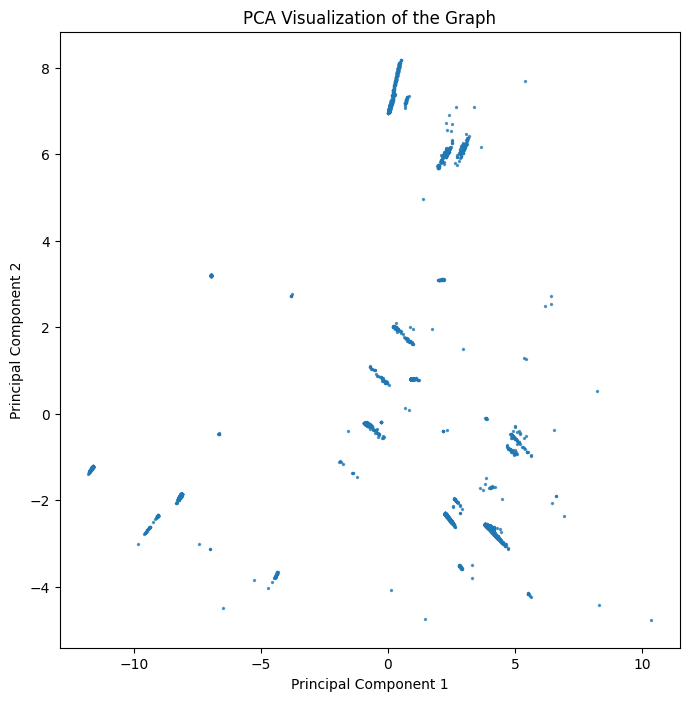

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], s=2, alpha=0.7)
plt.title("PCA Visualization of the Graph")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("./saved_figures/" + "pca_graph.png")
plt.show()

### MDS visualization

In [12]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_embedding = mds.fit_transform(distance_matrix)

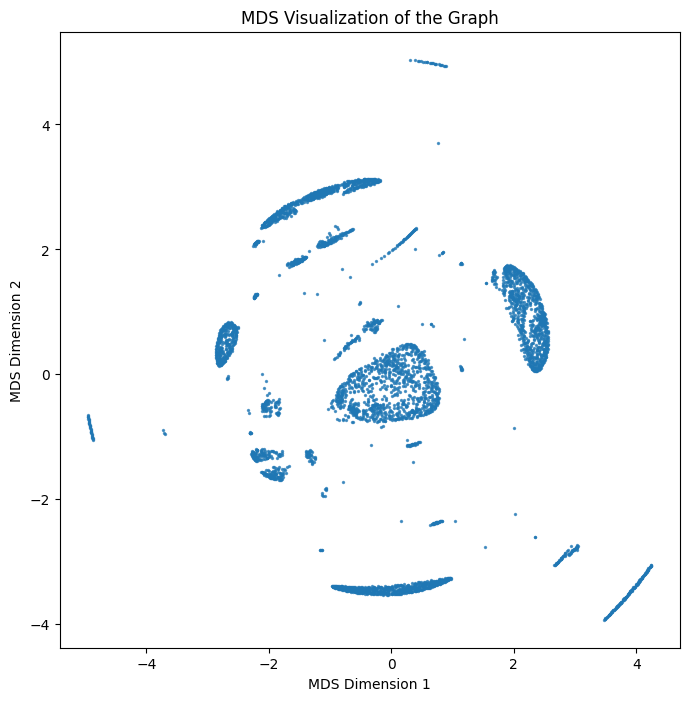

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(mds_embedding[:, 0], mds_embedding[:, 1], s=2, alpha=0.7)
plt.title("MDS Visualization of the Graph")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.savefig("./saved_figures/" + "mds_graph.png")
plt.show()

### Isomap visualization

In [14]:
isomap = Isomap(n_neighbors=10, n_components=2, metric="precomputed")
isomap_embedding = isomap.fit_transform(distance_matrix)

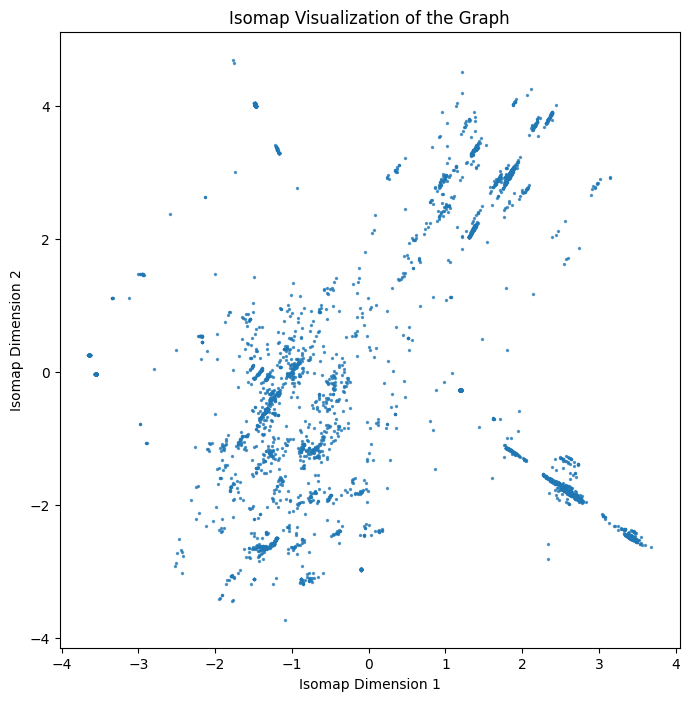

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], s=2, alpha=0.7)
plt.title("Isomap Visualization of the Graph")
plt.savefig("./saved_figures/" + "isomap_graph.png")
plt.xlabel("Isomap Dimension 1")
plt.ylabel("Isomap Dimension 2")
plt.show()

### LLE visualization

In [16]:
n_neighbors = 90
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, random_state=42)
lle_embedding = lle.fit_transform(distance_matrix)

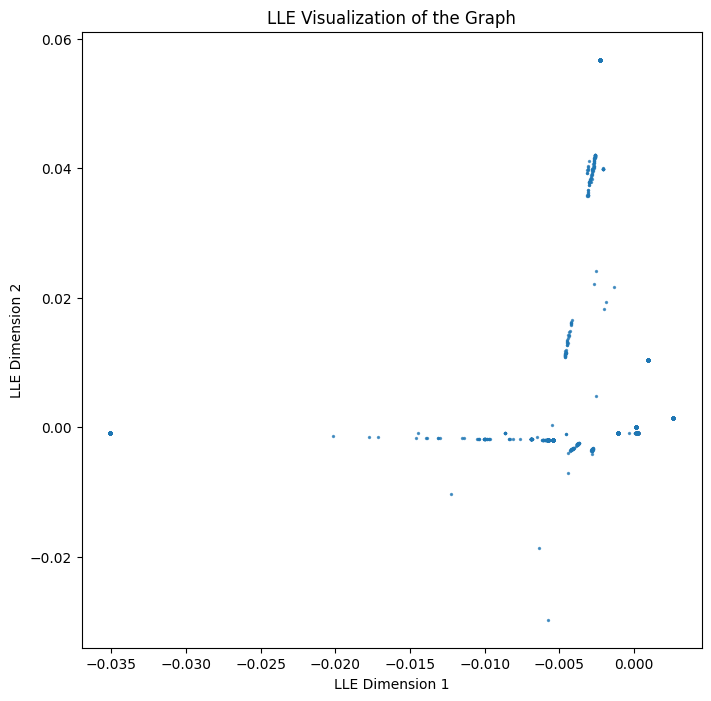

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(lle_embedding[:, 0], lle_embedding[:, 1], s=2, alpha=0.7)
plt.title("LLE Visualization of the Graph")
plt.savefig("./saved_figures/" + "lle_graph.png")
plt.xlabel("LLE Dimension 1")
plt.ylabel("LLE Dimension 2")
plt.show()

### Kernal PCA visualization

In [18]:
gamma = 1.0 / np.mean(distance_matrix[distance_matrix > 0])
similarity_matrix = np.exp(-gamma * distance_matrix)

kpca = KernelPCA(n_components=2, kernel="precomputed")
kpca_embedding = kpca.fit_transform(similarity_matrix)

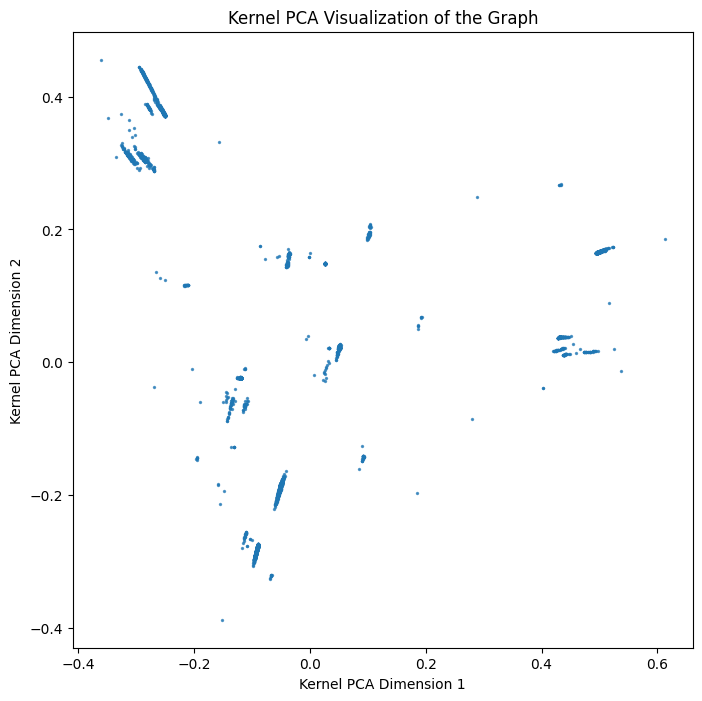

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(kpca_embedding[:, 0], kpca_embedding[:, 1], s=2, alpha=0.7)
plt.title("Kernel PCA Visualization of the Graph")
plt.savefig("./saved_figures/" + "kpca_graph.png")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.show()